In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import  keras

print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.12.0
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.7.2
numpy 1.23.5
pandas 2.0.3
sklearn 1.2.2
tensorflow 2.12.0
keras.api._v2.keras 2.12.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist#存入数据集

(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()

x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [3]:
x_train[0].shape


(28, 28)

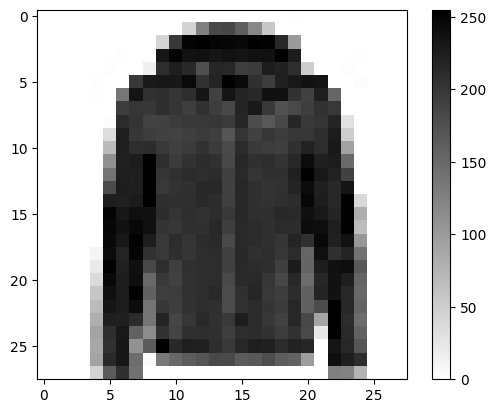

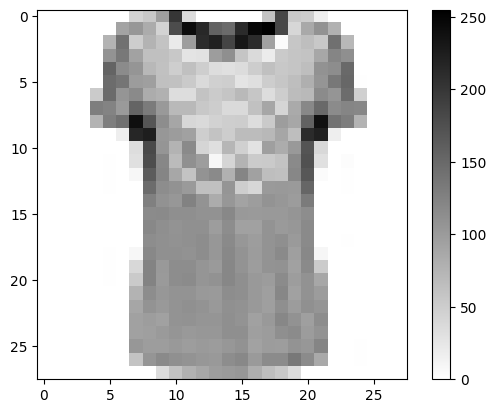

4
0


In [7]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.colorbar()
    plt.show()

for i in range(0,2):
    show_single_image(x_train[i])
print(y_train[0])
print(y_train[1])

In [18]:
x_train[0].shape

(28, 28)

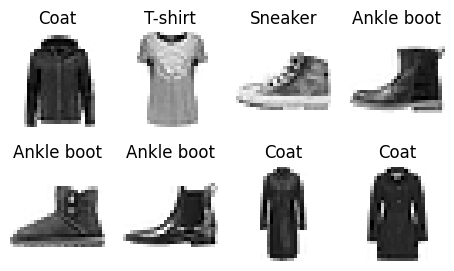

In [9]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    assert n_rows*n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index=n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()




class_names=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_imgs(2,4,x_train,y_train,class_names)


In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
print(model.output_shape)
model.add(keras.layers.Dense(300,activation="relu"))
print(model.output_shape)
model.add(keras.layers.Dense(100,activation="relu"))
print(model.output_shape)
model.add(keras.layers.Dense(10,activation="softmax"))
print(model.output_shape)

(None, 784)
(None, 300)
(None, 100)
(None, 10)


In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(0.001),metrics=["accuracy"])


In [13]:
model.layers

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 3.5633 - accuracy: 0.6595 - val_loss: 0.7272 - val_accuracy: 0.7280

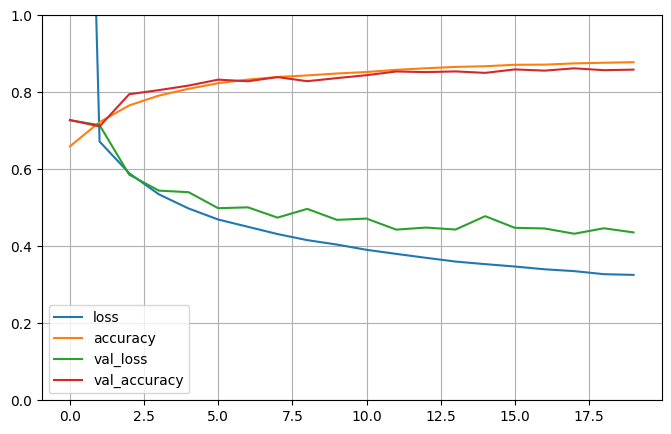

In [16]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [17]:
model.evaluate(x_test,y_test,verbose=0)

[0.44238701462745667, 0.8500000238418579]